In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

variable_names = [
    "tiene_mascota",
    "cantidad_mascotas",
    "tipo_mascota",
    "edad_gato",
    "raza_gato",
    "tamano_gato",
    "edad_perro",
    "raza_perro",
    "tamano_perro",
    "compra_juguete",
    "compra_juguete_ultimo_anio",
    "frecuencia_compra_juguetes",
    "tiempo_jugando_diario",
    "interactua_con_mascota",
    "tipo_juguetes_compra",
    "juguetes_favoritos",
    "mala_experiencia",
    "criterio_compra_juguetes",
    "factores_evaluar_calidad_juguetes",
    "factor_importante",
    "dispuesto_pagar_mejor_calidad",
    "calidad_media_juguetes",
    "diferencia_comportamiento",
    "precio_max_juguete",
    "forma_compra",
    "marca_preferida",
    "marca_preferida_nombre",
    "edad_encuestado",
    "unidad_familiar",
    "genero",
    "ocupacion_encuestado"
]

In [18]:
df = pd.read_csv('respuestas.csv')
df = df.drop('Marca temporal', axis=1) # Eliminar columna de marca temporal
df = df.drop('Puntuación', axis=1) # Eliminar columna de puntuación
df = df.rename(columns=dict(zip(df.columns, variable_names))) # Renombrar columnas
df.drop(df[df['tiene_mascota'] == 'No'].index, inplace=True) # Eliminar filas de personas que no tienen mascota

In [19]:
df['tipo_mascota'] = df['tipo_mascota'].map({'Perro': 0, 'Gato': 1}) # Convertir tipo de mascota a binario
df['compra_juguete'] = df['compra_juguete'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete a binario
df['compra_juguete_ultimo_anio'] = df['compra_juguete_ultimo_anio'].map({'Sí': 1, 'No': 0}) # Convertir compra de juguete en el último año a binario
df['interactua_con_mascota'] = df['interactua_con_mascota'].map({'Sí': 1, 'No': 0}) # Convertir interacción con mascota a binario
df['mala_experiencia'] = df['mala_experiencia'].map({'Sí': 1, 'No': 0}) # Convertir mala experiencia a binario
df['diferencia_comportamiento'] = df['diferencia_comportamiento'].map({'Sí': 1, 'No': 0}) # Convertir diferencia de comportamiento a binario
df['marca_preferida'] = df['marca_preferida'].map({'Sí': 1, 'No': 0}) # Convertir marca preferida a binario
df['genero'] = df['genero'].map({'Masculino': 'Masculino', 'Femenino': 'Femenino'}) # Convertir género a binario

C:\Users\34644\AppData\Local\Temp\ipykernel_25168\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

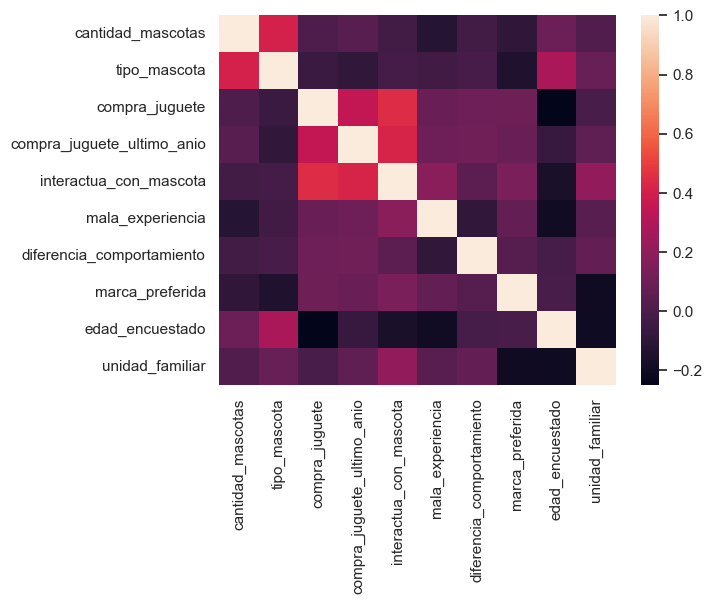

In [20]:
sns.heatmap(df.corr())

<AxesSubplot: xlabel='edad_encuestado', ylabel='Count'>

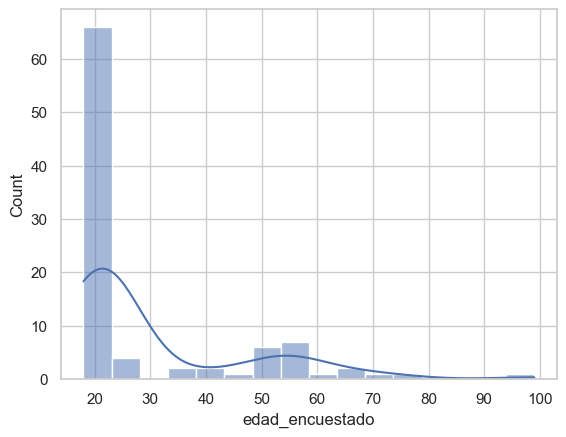

In [21]:
sns.histplot(df, x="edad_encuestado",kde=True)

<AxesSubplot: >

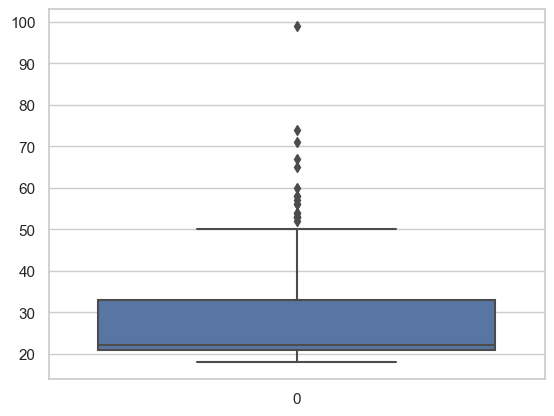

In [22]:
sns.boxplot(data=df['edad_encuestado'])

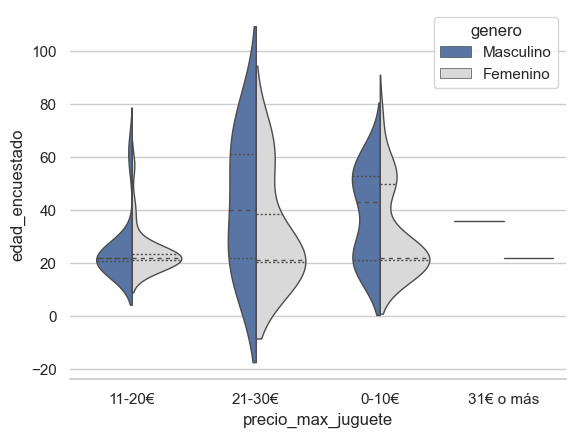

In [30]:
sns.set_theme(style="whitegrid")
sns.violinplot(
    data=df,
    x='precio_max_juguete',
    y='edad_encuestado',
    hue='genero',
    split=True,
    inner="quart",
    linewidth=1,
    palette={"Masculino": "b", "Femenino": ".85"},
)
sns.despine(left=True)

In [ ]:
sns.histplot(
    data=df,
    x="precio_max_juguete"
)

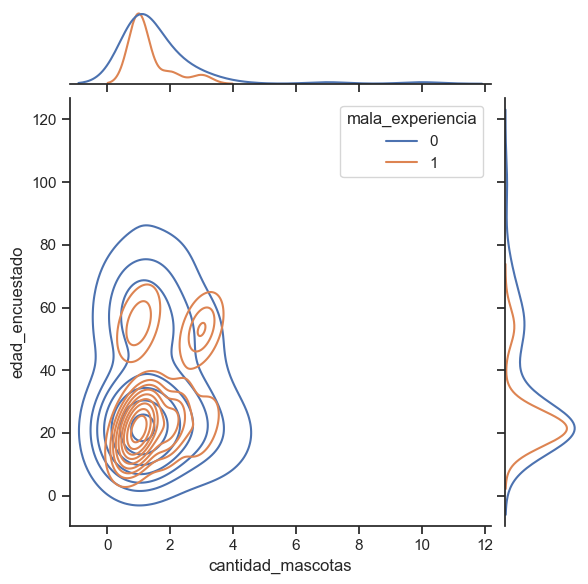

In [24]:
sns.set_theme(style="ticks")
sns.jointplot(data=df,
              x='cantidad_mascotas',
              y='edad_encuestado',
              hue='mala_experiencia',
              kind='kde'
)